In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()


## Load Data

In [2]:
data = pd.read_csv('allUsers.lcl.csv', na_values=['?']).iloc[1:, :]
data.Class.value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'User'}>,
        <AxesSubplot:title={'center':'X0'}>,
        <AxesSubplot:title={'center':'Y0'}>,
        <AxesSubplot:title={'center':'Z0'}>,
        <AxesSubplot:title={'center':'X1'}>],
       [<AxesSubplot:title={'center':'Y1'}>,
        <AxesSubplot:title={'center':'Z1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'Y2'}>,
        <AxesSubplot:title={'center':'Z2'}>,
        <AxesSubplot:title={'center':'X3'}>],
       [<AxesSubplot:title={'center':'Y3'}>,
        <AxesSubplot:title={'center':'Z3'}>,
        <AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'Y4'}>,
        <AxesSubplot:title={'center':'Z4'}>,
        <AxesSubplot:title={'center':'X5'}>],
       [<AxesSubplot:title={'center':'Y5'}>,
        <AxesSubplot:title={'center':'Z5'}>,
        <AxesSubplot:title={'center':'X6'}>,
        <AxesSubplot:title={'center':'Y6'}>,
  

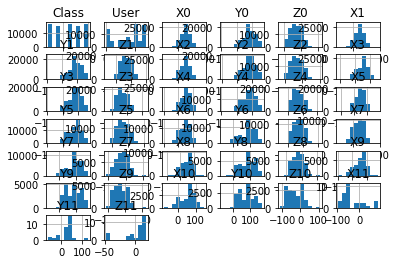

In [3]:
data.hist()

In [4]:
data.head(1).T

,1
Class,1.000000
User,0.000000
X0,54.263880
Y0,71.466776
Z0,-64.807709
X1,76.895635
Y1,42.462500
Z1,-72.780545
X2,36.621229
Y2,81.680557


## Drop Highly Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 1 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78095 non-null  int64  
 1   User    78095 non-null  int64  
 2   X0      78095 non-null  float64
 3   Y0      78095 non-null  float64
 4   Z0      78095 non-null  float64
 5   X1      78095 non-null  float64
 6   Y1      78095 non-null  float64
 7   Z1      78095 non-null  float64
 8   X2      78095 non-null  float64
 9   Y2      78095 non-null  float64
 10  Z2      78095 non-null  float64
 11  X3      77405 non-null  float64
 12  Y3      77405 non-null  float64
 13  Z3      77405 non-null  float64
 14  X4      74975 non-null  float64
 15  Y4      74975 non-null  float64
 16  Z4      74975 non-null  float64
 17  X5      65072 non-null  float64
 18  Y5      65072 non-null  float64
 19  Z5      65072 non-null  float64
 20  X6      52247 non-null  float64
 21  Y6      52247 non-null  float64
 22

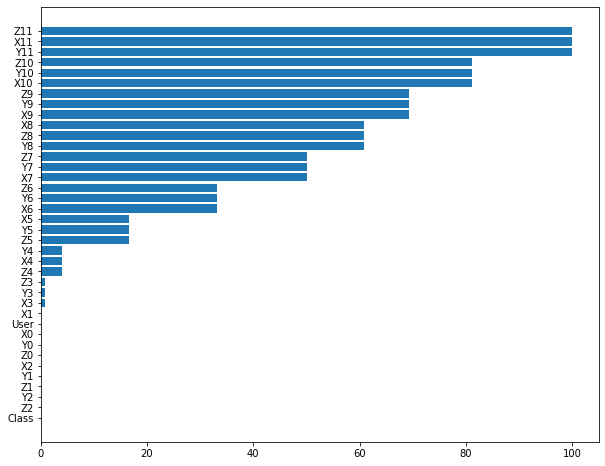

In [6]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':data.columns ,'na_percent':data.isnull().sum()/len(data)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

In [7]:
for i in [11, 10,9,8,7]:
    data.drop([f'X{i}', f'Y{i}', f'Z{i}'], axis=1, inplace=True)

## Drop entries with missing values

In [8]:
data.dropna(inplace=True)

## Drop enteries with same values

In [9]:
data = data.drop_duplicates()

In [10]:
len(data)

52247

# Preprocess Data

In [11]:
data.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
count,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,...,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000,52247.000000
mean,3.455356,8.121806,51.777424,90.919510,-23.845790,49.994770,92.870674,-22.713350,48.496180,91.826083,...,-23.644589,47.146681,88.783158,-24.910687,46.546071,86.914881,-25.603793,45.677699,83.732313,-26.639238
std,1.306095,4.451654,33.324971,41.122368,35.363869,33.732909,40.535733,35.636324,35.223439,40.401997,...,36.039225,35.973756,41.814809,36.157314,35.923032,42.340602,36.142567,36.342190,43.129421,35.709681
min,1.000000,0.000000,-108.552738,-72.401967,-120.284665,-111.685241,-96.142589,-120.290858,-99.917453,-100.789312,...,-118.154497,-99.107635,-88.316797,-157.199089,-99.014815,-70.759614,-134.637421,-100.084275,-67.283707,-153.449813
25%,2.000000,5.000000,29.672561,65.585248,-50.548907,27.424289,72.839870,-49.889898,22.498958,71.737517,...,-53.674601,18.265176,61.546227,-54.652869,17.430950,57.600268,-55.008470,15.486358,51.664992,-55.374994
50%,4.000000,9.000000,55.147339,91.806776,-21.502041,54.043980,94.424498,-19.761291,53.211724,94.350745,...,-21.172127,52.438641,94.096910,-23.182521,52.129297,93.616618,-24.575235,52.085617,92.154280,-26.457327
75%,5.000000,11.000000,76.200405,129.991045,4.887446,74.770226,130.691914,5.726845,74.213643,128.771494,...,5.566274,73.219080,123.487447,4.375563,72.820715,121.633391,3.868152,72.615455,111.473915,2.433526
max,5.000000,14.000000,163.329840,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,114.624261,172.275978,168.258643,119.237203,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907


array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'User'}>,
        <AxesSubplot:title={'center':'X0'}>,
        <AxesSubplot:title={'center':'Y0'}>,
        <AxesSubplot:title={'center':'Z0'}>],
       [<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'Y1'}>,
        <AxesSubplot:title={'center':'Z1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'Y2'}>],
       [<AxesSubplot:title={'center':'Z2'}>,
        <AxesSubplot:title={'center':'X3'}>,
        <AxesSubplot:title={'center':'Y3'}>,
        <AxesSubplot:title={'center':'Z3'}>,
        <AxesSubplot:title={'center':'X4'}>],
       [<AxesSubplot:title={'center':'Y4'}>,
        <AxesSubplot:title={'center':'Z4'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'Y5'}>,
        <AxesSubplot:title={'center':'Z5'}>],
       [<AxesSubplot:title={'center':'X6'}>,
        <AxesSubplot:title={'center':'Y6'}>,
 

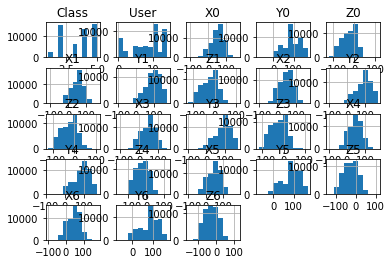

In [12]:
data.hist()

In [13]:
data.Class.value_counts()

5    15406
2    14761
4    13018
3     6423
1     2639
Name: Class, dtype: int64

In [14]:

data.User.value_counts()

10    7843
14    5812
0     4956
13    4841
11    4804
5     4281
6     4089
8     4052
9     3909
2     2593
1     2571
12    2087
7      264
4      145
Name: User, dtype: int64

In [18]:
data.Class.value_counts().min()

2639

## Sample in balance way

In [19]:

data = data.groupby('Class').apply(lambda x: x.sample(data.Class.value_counts().min()).reset_index(drop=True))

In [20]:
data.head()

Class  User         X0         Y0         Z0         X1         Y1  \
Class                                                                         
1     0      1    10  -8.227155  73.643256 -37.593100  65.174182  57.515534   
      1      1    10  69.099339  31.773566 -86.584150  53.137980  64.278846   
      2      1    10   6.046735  75.438610 -53.040008  70.369971  33.829650   
      3      1    10  66.660819  32.071679 -87.412999   7.247465  74.958259   
      4      1    10 -11.878380  73.273837 -39.057554   7.022866  74.702456   

                Z1         X2         Y2  ...  d(2,3)  d(2,4)  d(2,5)  d(2,6)  \
Class                                     ...                                   
1     0 -84.994105   6.969503  75.407770  ...     1.0     2.0     3.0     4.0   
      1 -72.201722  33.123296  75.942202  ...     1.0     2.0     3.0     4.0   
      2 -85.794384  51.278509  65.584169  ...     1.0     2.0     3.0     4.0   
      3 -52.868057  71.720225  58.106231  ...     1.0     2.0     3.0     4.0   
      4 -53.124234  50.765430  64.569877  ...     1.0     2.0     3.0     4.0   

         d(3,4)  d(3,5)  d(3,6)  d(4,5)  d(4,6)  d(5,6)  
Class                                                    
1     0     1.0     2.0     3.0     1.0     2.0     1.0  
      1     1.0     2.0     3.0     1.0     2.0     1.0  
      2     1.0     2.0     3.0     1.0     2.0     1.0  
      3     1.0     2.0     3.0     1.0     2.0     1.0  
      4     1.0     2.0     3.0     1.0     2.0     1.0  

[5 rows x 44 columns]

## Add distance Feture

In [23]:
from itertools import combinations
def get_point(i, row):
    return np.array((row[f'X{i}'], row[f'Y{i}'], row[f'Z{i}']))
def point_distance_func(a, b):
    def point_distance(row):
        x = get_point(a, row)
        y = get_point(b, row)
        return np.linalg.norm(x - y)
    return point_distance

for a, b in combinations(list(range(7)), 2):
    data[f'd({a},{b})'] = data.apply(point_distance_func(a,b), axis=1)

In [24]:
data

Class  User         X0          Y0         Z0         X1  \
Class                                                                  
1     0         1    10  -8.227155   73.643256 -37.593100  65.174182   
      1         1    10  69.099339   31.773566 -86.584150  53.137980   
      2         1    10   6.046735   75.438610 -53.040008  70.369971   
      3         1    10  66.660819   32.071679 -87.412999   7.247465   
      4         1    10 -11.878380   73.273837 -39.057554   7.022866   
...           ...   ...        ...         ...        ...        ...   
5     2634      5    14  26.360263  104.641786   9.999255 -32.777731   
      2635      5     8 -25.878514  129.877553  16.302754  14.159244   
      2636      5    13   6.310556  133.268092 -44.430685  43.433096   
      2637      5     9   9.642401  104.403391   5.198331 -18.247441   
      2638      5     1  74.798200   91.997684   7.247490  48.500464   

                    Y1         Z1         X2          Y2  ...     d(2,3)  \
Class                                                     ...              
1     0      57.515534 -84.994105   6.969503   75.407770  ...  81.876708   
      1      64.278846 -72.201722  33.123296   75.942202  ...  27.515499   
      2      33.829650 -85.794384  51.278509   65.584169  ...  26.797445   
      3      74.958259 -52.868057  71.720225   58.106231  ...  93.312607   
      4      74.702456 -53.124234  50.765430   64.569877  ...  40.187156   
...                ...        ...        ...         ...  ...        ...   
5     2634   70.987137 -11.688445  22.914035  145.552899  ...  44.313142   
      2635  149.406613   3.361332  59.813704   98.707090  ...  40.652462   
      2636  105.813522  11.658775  12.301988  105.808711  ...  22.589854   
      2637   85.949909 -26.115346  40.264286  148.037266  ...  67.311887   
      2638  100.315999  -5.711995  80.295809  128.651939  ...  65.766693   

                d(2,4)     d(2,5)     d(2,6)      d(3,4)      d(3,5)  \
Class                                                                  
1     0      25.331211  97.015330  52.380298   63.285340   40.263912   
      1      48.018317  45.439130  86.379039   22.698308   69.770357   
      2      71.740871  18.363175  70.161106   47.922172   45.114226   
      3      24.285412  49.715727  65.945781   69.367690   45.996584   
      4      70.365876  23.760776  25.549196   40.428827   26.172231   
...                ...        ...        ...         ...         ...   
5     2634  115.097449  58.847396  37.226445  128.816917   56.140820   
      2635   67.249563  96.550031  70.646246   29.250712   65.165563   
      2636   51.471680  61.440863  49.718827   29.454416   46.530097   
      2637   33.931411  75.413480  47.365219   84.471563  107.977040   
      2638   78.505131  35.008860  36.012364   34.440665   79.807323   

                d(3,6)      d(4,5)      d(4,6)     d(5,6)  
Class                                                      
1     0      38.005912   86.944742   28.729514  70.039191  
      1      97.363940   90.376184  109.176006  64.086634  
      2      87.049601   89.383091  110.000487  64.337720  
      3     107.360969   25.815775   70.095985  86.120138  
      4      63.435095   65.114314   86.201082  49.133886  
...                ...         ...         ...        ...  
5     2634   74.971457  117.329544   91.655285  81.621590  
      2635   62.052316   38.522604   69.990308  86.035634  
      2636   51.685115   40.426839   64.940455  42.127460  
      2637   50.029835   43.442338   69.775369  97.469953  
      2638   61.446743   97.662342   56.943803  64.979750  

[13195 rows x 44 columns]

In [26]:
data.to_csv('data_processed.csv', index=False)